# Анализ потенциально перспективных игровых платформ и жанров компьютерных игр

### Описание проекта

Для проведения анализа и выявления потеницально переспктивных игровых платформ и жанров, мы проанализируем исторические данные о производстве и продажах игр с 1980 по 2016 гг., оценках пользователей и экспертов, а так же игровых платформах, полученные из открытых источников. Целью проекта является определение закономерностей влияющих на успешность игры/игровой платформы. Это позволит нам предоставить рекомендации о потенциально популярных продуктах и спланировать будущие рекламные кампании. Для достижения данной цели мы последовательно выполним несколько шагов: 
* подготовим датасет к анализу
* проведем исследовательский анализ полученных данных
* сформируем портрет пользователя для регионов Северная Америка, Европа и Япония
* сформулируем и проверим статистические гипотезы
* представим результат исследования и рекомендации о перспективном продукте в текстовом виде


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


### Общая информация о датасете

In [2]:
games = pd.read_csv('_.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#оценим количество пропусков
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Датасет состоит из 16715 строк и 11 столбцов:

После знакомства с данными выявлены некоторые очевидные особенности датасета, которые необходимо исправить для проведения дальнейшего анализа. 
Для удобства работы, необходимо изменить регистр в названии столбцов на строчный;

Изменить тип данных: 
* столбец Year_of_Release со str на int 
* столбец User_Score со str на float

Пропуски в значимых количествах присутствуют в столбцах Critic_Score, User_Score, Rating. Возможно потребуются и другие правки, которые будут отражены в выводе по разделу "предобработка данных".

### Предобработка данных

#### Приведение названий столбцов к строчному написанию

In [6]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Перевод данных столбцов в новые типы данных

In [7]:
games['year_of_release'] = games['year_of_release'].astype('Int64')


In [8]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1.9       2
1.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Прежде чем перевести данные в столбце user_score, необходимо провести обработку пропусков и разобраться со значением tbd которое встречается в столбце 2424 раза. Это много и требует обработки. tbd можно определить как to be determined - (будет определено). Предположим, что на момент занесения данных в таблицу было слишком мало оценок для вынесения однозначного рейтинга, поэтому будет справедливо заменить эти значения на пропуски - NaN

In [10]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

#### Обработка пропусков

In [11]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Для общей гармонии и красоты данных, заполним пропуски в столбце rating значением unrated

In [12]:
games['rating'] = games['rating'].fillna('unrated')

In [13]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unrated
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unrated


В столбцах name и genre есть по два пропуска, и они совпадают в одних и тех же строках. Игры 1993 года с околонулевыми показателями продаж, можно смело отбросить 2 строки, никакого существенного значения для дальнейшего анализа отсутствие этих строк иметь не будет.

In [14]:
games = games.dropna(subset = ['name'])

In [15]:
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [16]:
print('Количество пропусков в колонке "Год выпуска игры":', games['year_of_release'].isna().sum())


Количество пропусков в колонке "Год выпуска игры": 269


In [17]:
print('Процент пропусков в колонке "Год выпуска игры":', round(games['year_of_release'].isna().sum()/len(games['year_of_release'])*100, 2),'%')

Процент пропусков в колонке "Год выпуска игры": 1.61 %


К сожалению, мы не можем достоверно заполнить пропущенные значения в столбце year_of_release, но здесь процент пропусков невелик - 1.61% и данными значениями можно пожертвовать.

In [18]:
games = games.dropna(subset = ['year_of_release']).reset_index(drop=True)

In [19]:
print('Количество пропусков в столбце "Оценка критиков":', games['critic_score'].isna().sum())
print('Количество пропусков в столбце "Оценка пользователей":', games['user_score'].isna().sum())

Количество пропусков в столбце "Оценка критиков": 8461
Количество пропусков в столбце "Оценка пользователей": 8981


In [20]:
print('Процент пропусков в столбце "Оценка критиков":', round(games['critic_score'].isna().sum()/len(games['critic_score'])*100, 2),'%')
print('Процент пропусков в столбце "Оценка пользователей":', round(games['user_score'].isna().sum()/len(games['user_score'])*100, 2),'%')

Процент пропусков в столбце "Оценка критиков": 51.45 %
Процент пропусков в столбце "Оценка пользователей": 54.62 %


Пропуски в столбцах с оценками критиков и пользователей занимают более половины датасета, удаление такого объема данных критически повлияет на состояние датасета и достоверность проведения дальнейшего анализа. Так же считаем нецелесообразным заполнять эти пропуски искусственными значениями, поэтому оставляем пропуски как есть.

#### Проверка на явные дубликаты

Структура датасета подразумевает встречаемость одинаковых значений во всех столбцах, кроме одного - название игры. Его и проанализируем.

In [21]:
games['name'].value_counts().head(10)

Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
LEGO Jurassic World             8
The LEGO Movie Videogame        8
FIFA 15                         8
Cars                            8
Monopoly                        8
FIFA Soccer 13                  8
Name: name, dtype: int64

In [22]:
games[(games['name'] == 'Need for Speed: Most Wanted')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
252,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
519,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,unrated
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1976,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2025,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,unrated
3531,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6177,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,unrated
6310,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Анализ показал, что дубликаты в данном столбце данных имеются, но они вызваны тем, что игры выпускаются на различных платформах. Кроме того, самые популярные игры переиздаются спустя годы, под новые выпущенные игровые платформы, или с некоторыми доработками графики и тп. Иллюстрацию обоих тезисов мы видим на примере игры Need for Speed: Most Wanted. 
Поэтому, в данном случае это "правильные" дубликаты, оставляем их в датасете.

#### Добавление столбца с суммарными продажами во всех регионах.

In [23]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [24]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unrated,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unrated,28.31


Датасет был обработан и подготовлен к проведению анализа. Были приведены к строчному регистру названия столбцов, отброшены строки с пропусками в названиях игр (всего 2 строки), удалены 269 пропусков в столбце с годом выхода игры (что составило 1,61% от всего датасета) заполнены пропуски в столбце рейтинга игр и оценки пользователей. В этом столбце находилось значение "заглушка", которое вероятно предполагалось заполнить данными по мере их поступления, но у нас таких данных нет, поэтому заменили это заглушку на пропуски. Так тоже бывает, иногда мы не избавляемся от пропусков, а преобразуем отсутствующие данные в них. 
Пропуски в данных столбцах могли возникнуть как по техническим причинам, это вероятно пропуски в столбце year_of_release, так и по причине отсутствия оценок на момент попадания данных в таблицу, это можно предположить в столбцах critic_score и 	user_score (отдельный вид пропусков в одном из этих столбцов мы описали выше). Эта особенность хорошо заметна для игр ранних годов издания, индустрия геймерской критики и платформ для оценки игр на тот момент еще не сформировалась. 
Пропуски в столбце rating возникли по причине разных рейтинговых агентств присваивающих свои оценки играм. Например, в нашем датаесете рейтинг дан по оценке Entertainment Software Rating Board, организации осуществляющей свою деятельность в Северной Америке, соответсвенно для игр выпущенных в Японии их оценок просто не существует. 

Были изменены типы данных в столбцах с годом выпуска игры и в оценке пользователей, где, вероятно, из-за технической ошибки, числовые значения были записаны в виде строк, что стало бы существенным препятствием к проведению анализа. Проведена проверка на наличие дубликатов. Так же, для удобства построения графиков и проведения дальнейшего анализа был сформирован новый столбец с суммой продаж игр по всем регионам исследования. 

### Исследовательский анализ данных

#### Выпуск игр по годам

In [26]:
games_by_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')

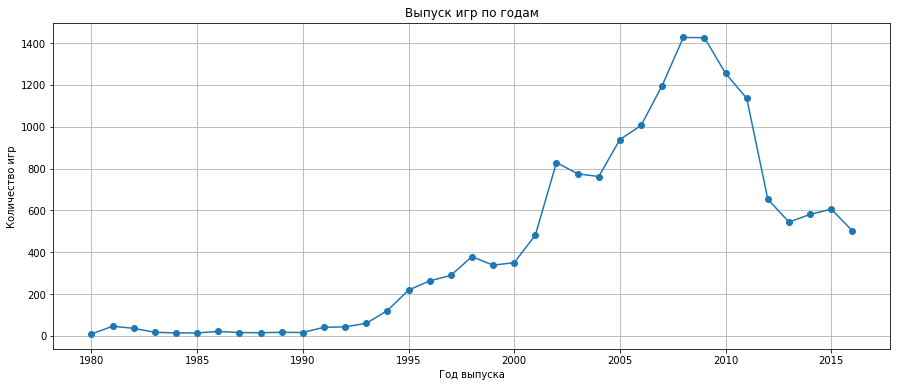

In [27]:
games_by_year.plot(style='o-', 
                   title='Выпуск игр по годам', 
                   xlabel='Год выпуска', 
                   ylabel='Количество игр', 
                   alpha=1, 
                   grid=True, 
                   legend=False, 
                   figsize=(15,6));

Производство игр началось в 1980 году, но до середины 1990х шло в штучных количествах, что вполне логично, поскольку персональные компьютеры и игровые приставки в то время были исключением, нежели системой. Быстрый рост выпуска игр начинается после 1993 года и упирается в потолок в 2008 году. Вероятно, это связано с эволюцией мобильных телефонов. В 2007 на рынок вышел первый iPhone, а в 2008 году представлен первый смартфон на платформе Android. После чего, в период с 2009 по 2013 год количество выпускаемых игр сокращается более чем в 2 раза и откатывается к уровню начала 2000х годов. 

#### Продажи игр по платформам

In [28]:
games_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')

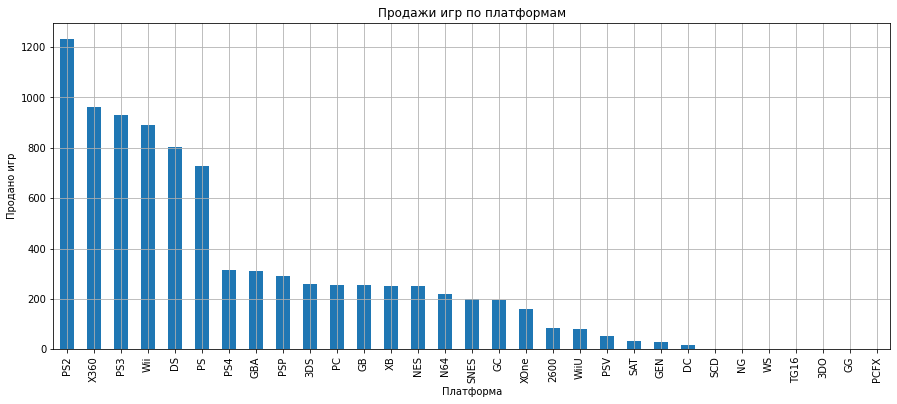

In [29]:
games_platform.sort_values(by='total_sales', ascending=False).plot(kind='bar', 
                                                                    title='Продажи игр по платформам', 
                                                                    xlabel='Платформа', 
                                                                    ylabel='Продано игр', 
                                                                    alpha=1, 
                                                                    grid=True, 
                                                                    legend=False, 
                                                                    figsize=(15,6));

График очень наглядно демонстирурет нам 6 лидеров индустрии, которые очень уверенно отрываются от конкурентов. Это PS2, X360, PS3, Wii, DS, PS. Далее подробнее ознакомимся с показателями каждой из них. 


In [30]:
def platform_total_sale_by_year(name, data):
    dataset = data[(data['platform'] == name) & (data['year_of_release'] > 2002)]
    total = dataset.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [31]:
games_platform_top6 = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
games_platform_top6 = games_platform_top6.reset_index()
games_platform_top6 

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


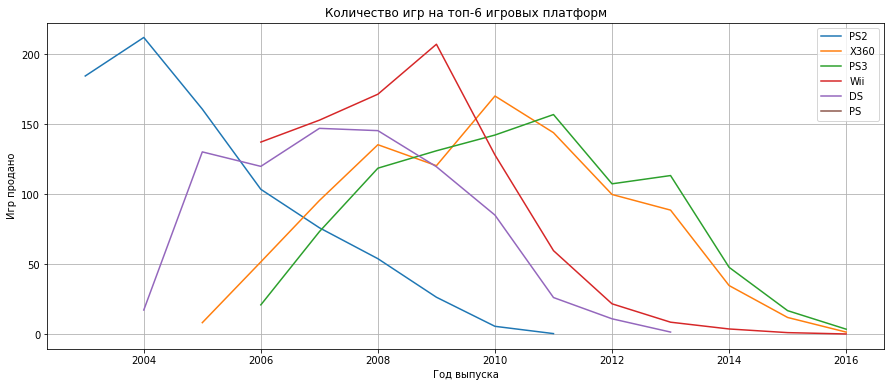

In [32]:
plt.figure(figsize=(15,6))
plt.title('Количество игр на топ-6 игровых платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Игр продано')
plt.grid(True)

for i in list(games_platform_top6['platform']):
    sns.lineplot(data=platform_total_sale_by_year(i,games)['total_sales'], label=i,)
    plt.legend()

Анализ жизненных циклов топ-6 платформ показывает, что все платформы в среднем живут 10 лет. График распределения жизненного цикла похож на нормальный, пика развития достигают к 5 годам, потом затухают. А также, стоит отметить, что топ-6 платформ к дате проведения анализа сошли на нет. Стоит присмотреться к молодым и развивающимся на данный момент платформам.

#### Поиск развивающихся и потенциально прибыльных платформ и выбор актульного периода для прогнозирования будущих продаж

Как было сказано выше, цикл жизни самых продаваемых платформ к 2016 году подошел к концу. Поскольку нам нужно планировать продажи на 2017 год, а цикл жизни популярных консолей составлял 10 лет, с пиком на 5 году жизни, можно выбрать в качестве актуального периода, период начиная с 2013 года. Поскольку в таком случае мы сможем отсечь уходящие платформы и одновременно заметим платформы, набирающие популярность, на которые можно будет сделать ставку в прогнозах.

In [33]:
games['total_sales'].describe()

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [34]:
actual_platform = games.query('year_of_release >= 2013')

In [35]:
actual_platform_pivot = actual_platform.pivot_table(index='platform', values='total_sales', aggfunc='sum')

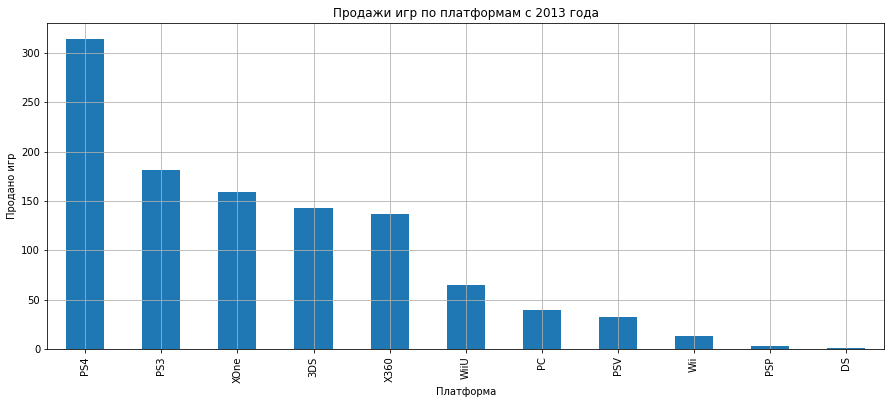

In [36]:
actual_platform_pivot.sort_values(by='total_sales', ascending=False).plot(kind='bar', 
                                                                    title='Продажи игр по платформам c 2013 года', 
                                                                    xlabel='Платформа', 
                                                                    ylabel='Продано игр', 
                                                                    alpha=1, 
                                                                    grid=True, 
                                                                    legend=False, 
                                                                    figsize=(15,6));

Таким образом, проанализировав график можно отметить, что PS3 и X360 попали в лидеры, но на излете своей популярности и уходят с рынка. Вместе с этим обратим внимание на новых лидеров:
* PS4
* XOne
* 3DS

Вот к этим платформам стоит присмотреться в прогнозах на будущее. Темной лошадкой можно назвать WiiU ну и отдельно отметим не хватющий звезд с неба, но стабильно имеющий свою аудиторию - PC.

#### График «ящик с усами» по глобальным продажам игр

In [37]:
actual_platform.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


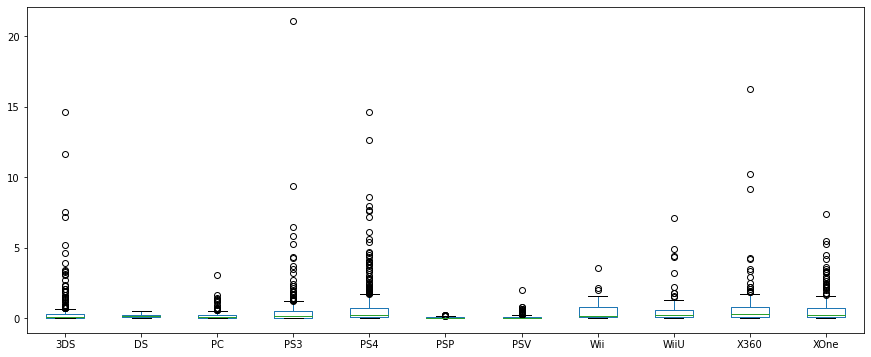

In [38]:
actual_platform.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', figsize=(15,6));

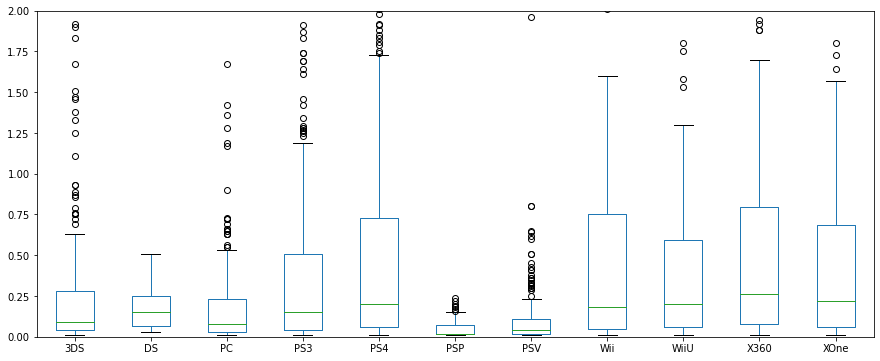

In [39]:
actual_platform.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', figsize=(15,6), ylim=(0,2));

После анализа диаграмм размаха, можно сказать, что роли платформ несколько смещаются. WiiU, которую после анализа суммы продаж игр мы назвали темной лошадкой, демонстрирует популярность и уверено выходит в тройку лидеров (вместе с PS4 и XOne), по среднему и медиане, а вот 3DS отодвигается в лигу к PC. У всех платформ распределения скошены вправо и медиана располагается левее среднего значения. PS4, XOne и WiiU имеют близкие значения медиан 0.20-0.22.

#### Оценка влияния отзывов пользователей и критиков на продажи игр

Для оценки корреляции и зависимости продаж игр от отзывов критиков и пользователй предлагаем взять 5 набирающих популярность.  Начнем с PS4.

Построим диаграммы рассеяния зависимости продаж платформы PS4 от оценок критиков. Для лучшей читаемости графиков, построим дополнительные графики с отсечкой пиковых значений продаж.

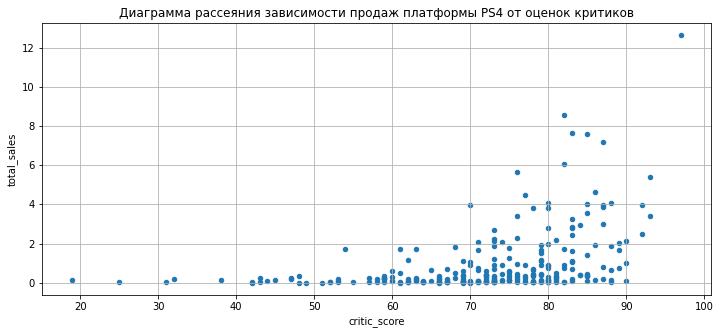

In [41]:
actual_platform.query('platform=="PS4"').sort_values(by='critic_score',ascending=True).plot(kind='scatter', 
                                                                                                     x='critic_score', 
                                                                                                     y='total_sales', 
                                                                                                     title='Диаграмма рассеяния зависимости продаж платформы PS4 от оценок критиков', 
                                                                                                     grid=True, 
                                                                                                     figsize=(12,5));

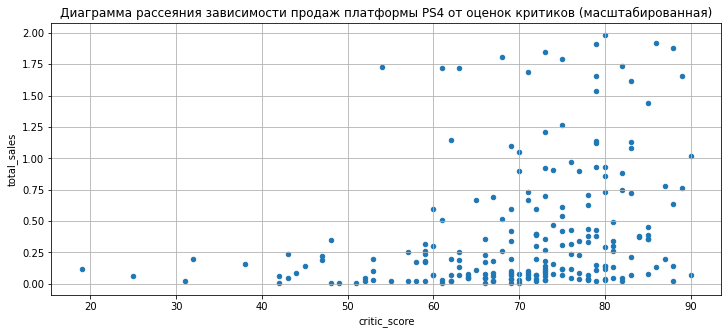

In [42]:
actual_platform.query('platform=="PS4" and total_sales<=2').sort_values(by='critic_score',ascending=True).plot(kind='scatter', 
                                                                                                     x='critic_score', 
                                                                                                     y='total_sales', 
                                                                                                     title='Диаграмма рассеяния зависимости продаж платформы PS4 от оценок критиков (масштабированная)', 
                                                                                                     grid=True, 
                                                                                                     figsize=(12,5));

Диаграмма рассеяния по оценкам пользователей

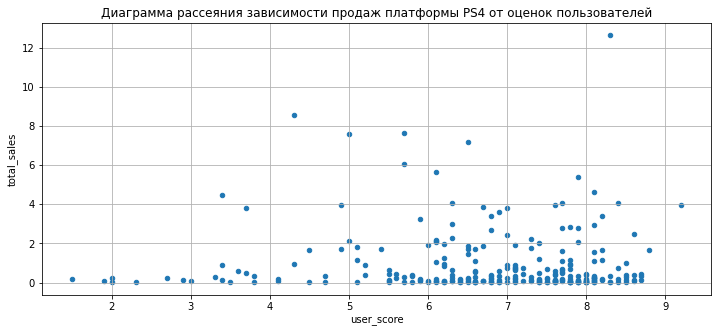

In [43]:
actual_platform.query('platform=="PS4"').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                                                   x='user_score',
                                                                                                   y='total_sales', 
                                                                                                   title='Диаграмма рассеяния зависимости продаж платформы PS4 от оценок пользователей', 
                                                                                                   grid=True, 
                                                                                                   figsize=(12,5));

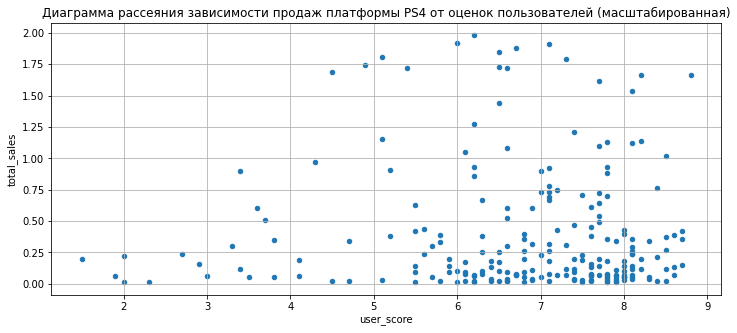

In [44]:
actual_platform.query('platform=="PS4" and total_sales<=2').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                                                   x='user_score',
                                                                                                   y='total_sales', 
                                                                                                   title='Диаграмма рассеяния зависимости продаж платформы PS4 от оценок пользователей (масштабированная)', 
                                                                                                   grid=True, 
                                                                                                   figsize=(12,5));

In [45]:
actual_platform[actual_platform.platform == 'PS4'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Матрица корореляции и построенные графики показывают нам, что существует некоторая корреляция между оценками критиков и уровнем продаж игр на платформе PS4. Можно обозначить её как среднюю. В то же время, продажи не реагируют на оценки пользователей.

Построим такие же диаграммы и матрицы корреляции для оставшейся четверки передовых и перспективных платформ.

XOne

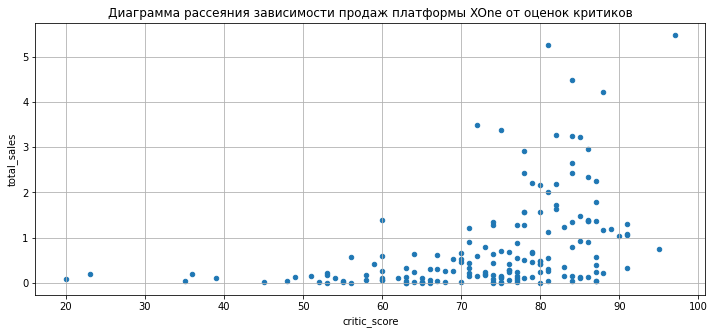

In [46]:
actual_platform.query('platform=="XOne"').sort_values(by='critic_score',ascending=True).plot(kind='scatter', 
                                                                                                     x='critic_score', 
                                                                                                     y='total_sales', 
                                                                                                     title='Диаграмма рассеяния зависимости продаж платформы XOne от оценок критиков', 
                                                                                                     grid=True, 
                                                                                                     figsize=(12,5));

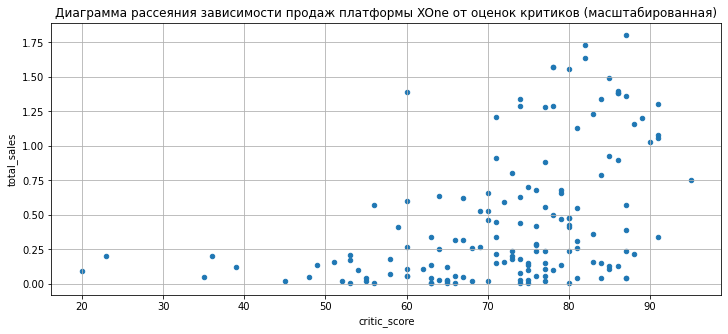

In [47]:
actual_platform.query('platform=="XOne" and total_sales<=2').sort_values(by='critic_score',ascending=True).plot(kind='scatter', 
                                                                                                     x='critic_score', 
                                                                                                     y='total_sales', 
                                                                                                     title='Диаграмма рассеяния зависимости продаж платформы XOne от оценок критиков (масштабированная)', 
                                                                                                     grid=True, 
                                                                                                     figsize=(12,5));

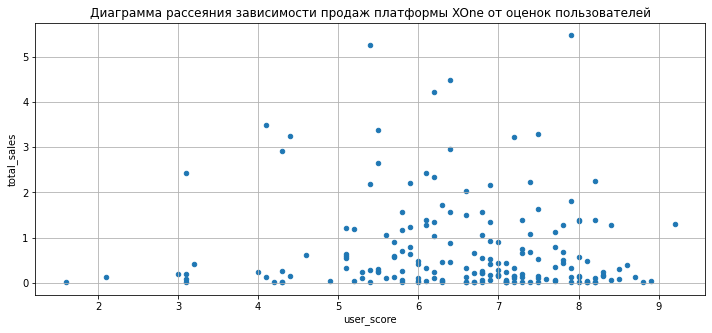

In [48]:
actual_platform.query('platform=="XOne"').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                                                   x='user_score',
                                                                                                   y='total_sales', 
                                                                                                   title='Диаграмма рассеяния зависимости продаж платформы XOne от оценок пользователей', 
                                                                                                   grid=True, 
                                                                                                   figsize=(12,5));

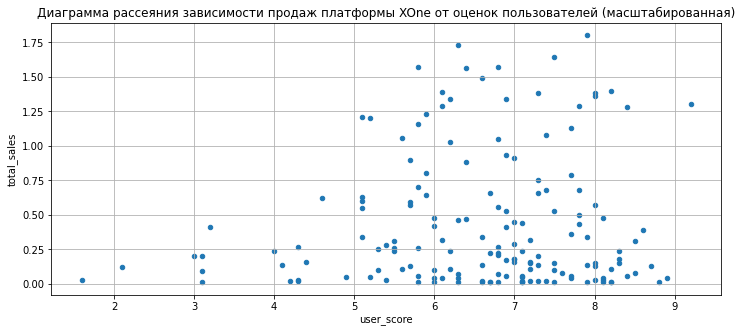

In [49]:
actual_platform.query('platform=="XOne" and total_sales<=2').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                                                   x='user_score',
                                                                                                   y='total_sales', 
                                                                                                   title='Диаграмма рассеяния зависимости продаж платформы XOne от оценок пользователей (масштабированная)', 
                                                                                                   grid=True, 
                                                                                                   figsize=(12,5));

In [50]:
actual_platform[actual_platform.platform == 'XOne'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


Точно такая же ситуация. Корреляция между продажами и оценками критиков находится на уровне 0.41, корреляция с оценками пользователей даже слегка обратная.

3DS

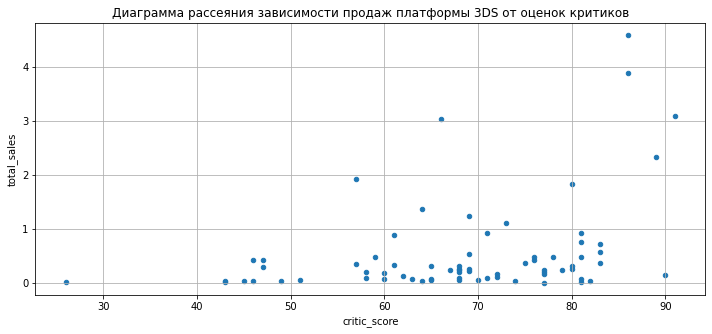

In [51]:
actual_platform.query('platform=="3DS"').sort_values(by='critic_score',ascending=True).plot(kind='scatter', 
                                                                                                     x='critic_score', 
                                                                                                     y='total_sales', 
                                                                                                     title='Диаграмма рассеяния зависимости продаж платформы 3DS от оценок критиков', 
                                                                                                     grid=True, 
                                                                                                     figsize=(12,5));

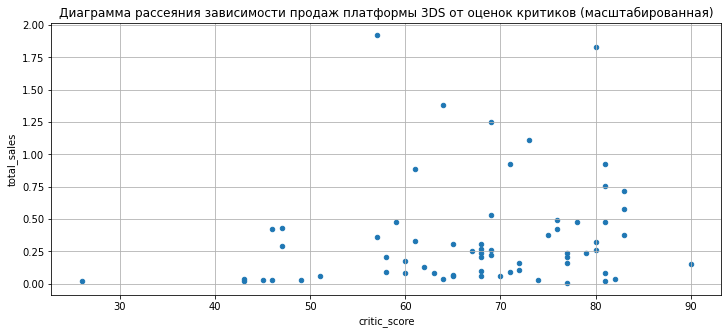

In [52]:
actual_platform.query('platform=="3DS" and total_sales<=2').sort_values(by='critic_score',ascending=True).plot(kind='scatter', 
                                                                                                     x='critic_score', 
                                                                                                     y='total_sales', 
                                                                                                     title='Диаграмма рассеяния зависимости продаж платформы 3DS от оценок критиков (масштабированная)', 
                                                                                                     grid=True, 
                                                                                                     figsize=(12,5));

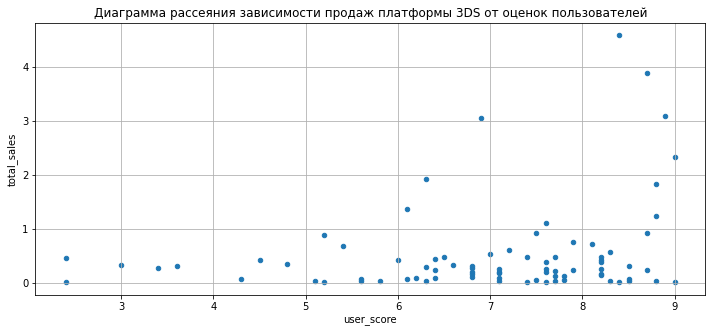

In [53]:
actual_platform.query('platform=="3DS"').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                                                   x='user_score',
                                                                                                   y='total_sales', 
                                                                                                   title='Диаграмма рассеяния зависимости продаж платформы 3DS от оценок пользователей', 
                                                                                                   grid=True, 
                                                                                                   figsize=(12,5));

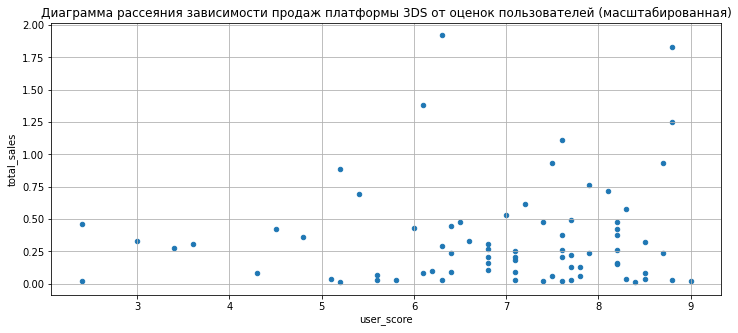

In [54]:
actual_platform.query('platform=="3DS" and total_sales<=2').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                                                   x='user_score',
                                                                                                   y='total_sales', 
                                                                                                   title='Диаграмма рассеяния зависимости продаж платформы 3DS от оценок пользователей (масштабированная)', 
                                                                                                   grid=True, 
                                                                                                   figsize=(12,5));

In [55]:
actual_platform[actual_platform.platform == '3DS'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


У платформы 3DS ситуация чуть отличается. Здесь влияние пользователей приближается к влиянию критиков, впрочем про оба эти канала влияния можно сказать, что они оказывают незначительное влияние на продажи.

WiiU

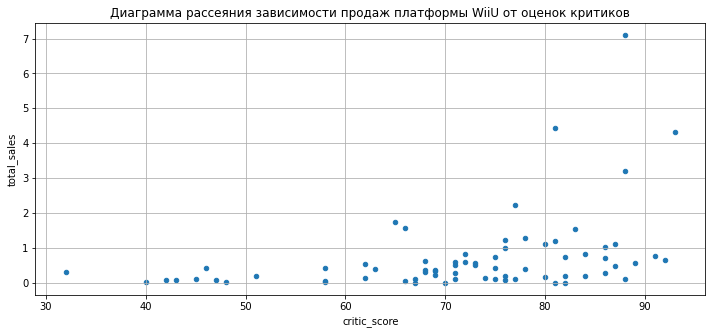

In [56]:
actual_platform.query('platform=="WiiU"').sort_values(by='critic_score',ascending=True).plot(kind='scatter', 
                                                                                                     x='critic_score', 
                                                                                                     y='total_sales', 
                                                                                                     title='Диаграмма рассеяния зависимости продаж платформы WiiU от оценок критиков', 
                                                                                                     grid=True, 
                                                                                                     figsize=(12,5));

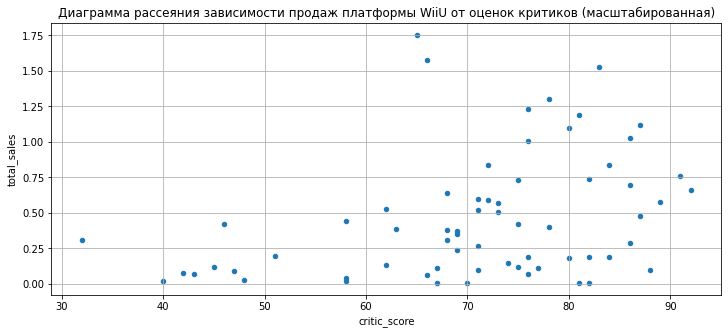

In [57]:
actual_platform.query('platform=="WiiU" and total_sales<=2').sort_values(by='critic_score',ascending=True).plot(kind='scatter', 
                                                                                                     x='critic_score', 
                                                                                                     y='total_sales', 
                                                                                                     title='Диаграмма рассеяния зависимости продаж платформы WiiU от оценок критиков (масштабированная)', 
                                                                                                     grid=True, 
                                                                                                     figsize=(12,5));

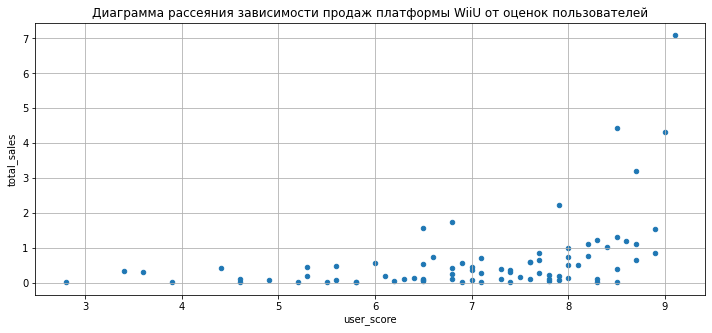

In [58]:
actual_platform.query('platform=="WiiU"').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                                                   x='user_score',
                                                                                                   y='total_sales', 
                                                                                                   title='Диаграмма рассеяния зависимости продаж платформы WiiU от оценок пользователей', 
                                                                                                   grid=True, 
                                                                                                   figsize=(12,5));

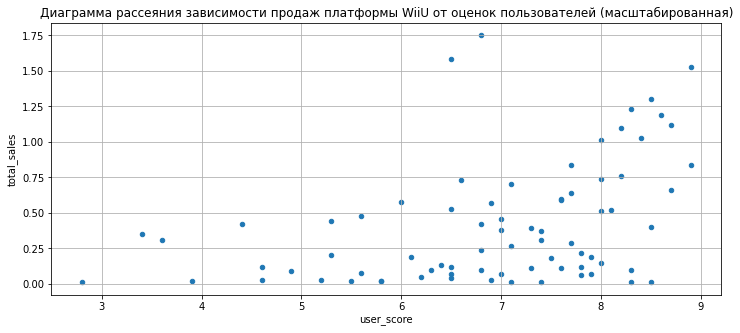

In [59]:
actual_platform.query('platform=="WiiU" and total_sales<=2').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                                                   x='user_score',
                                                                                                   y='total_sales', 
                                                                                                   title='Диаграмма рассеяния зависимости продаж платформы WiiU от оценок пользователей (масштабированная)', 
                                                                                                   grid=True, 
                                                                                                   figsize=(12,5));

In [60]:
actual_platform[actual_platform.platform == 'WiiU'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.376415,0.419330
critic_score,0.376415,1.000000,0.721313
user_score,0.419330,0.721313,1.000000


Удивительное дело, у игр на платформе WiiU, влияние пользователей на продажи превосходит влияние критиков! 

PC

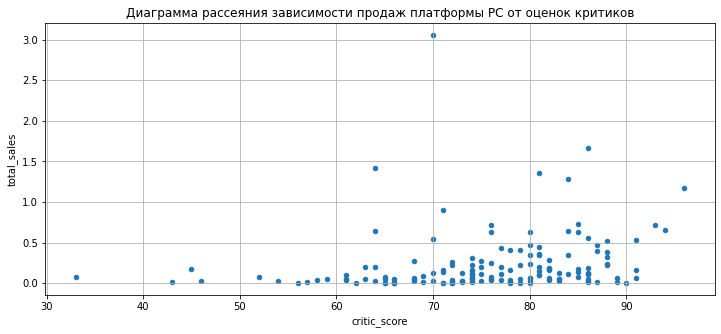

In [61]:
actual_platform.query('platform=="PC"').sort_values(by='critic_score',ascending=True).plot(kind='scatter', 
                                                                                                     x='critic_score', 
                                                                                                     y='total_sales', 
                                                                                                     title='Диаграмма рассеяния зависимости продаж платформы PC от оценок критиков', 
                                                                                                     grid=True, 
                                                                                                     figsize=(12,5));

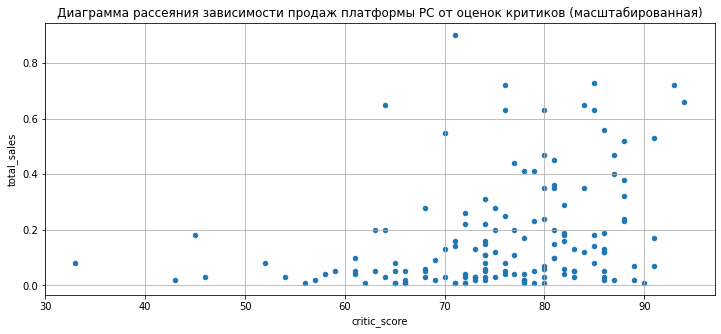

In [62]:
actual_platform.query('platform=="PC" and total_sales<=1').sort_values(by='critic_score',ascending=True).plot(kind='scatter', 
                                                                                                     x='critic_score', 
                                                                                                     y='total_sales', 
                                                                                                     title='Диаграмма рассеяния зависимости продаж платформы PC от оценок критиков (масштабированная)', 
                                                                                                     grid=True, 
                                                                                                     figsize=(12,5));

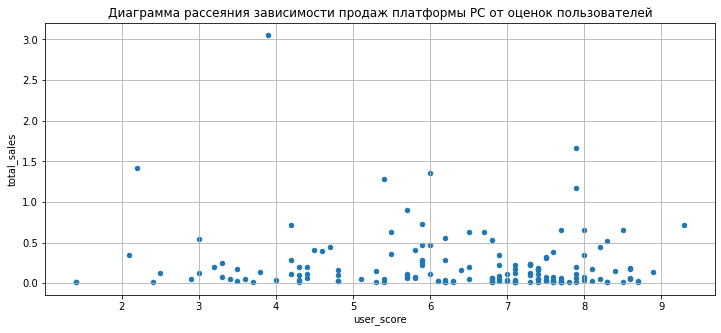

In [63]:
actual_platform.query('platform=="PC"').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                                                   x='user_score',
                                                                                                   y='total_sales', 
                                                                                                   title='Диаграмма рассеяния зависимости продаж платформы PC от оценок пользователей', 
                                                                                                   grid=True, 
                                                                                                   figsize=(12,5));

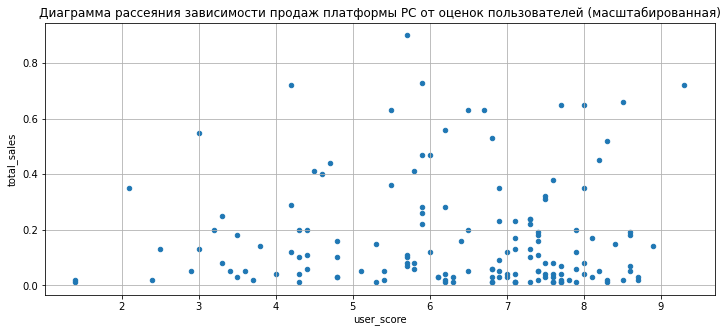

In [64]:
actual_platform.query('platform=="PC" and total_sales<=1').sort_values(by='user_score',ascending=True).plot(kind='scatter',
                                                                                                   x='user_score',
                                                                                                   y='total_sales', 
                                                                                                   title='Диаграмма рассеяния зависимости продаж платформы PC от оценок пользователей (масштабированная)', 
                                                                                                   grid=True, 
                                                                                                   figsize=(12,5));

In [65]:
actual_platform[actual_platform.platform == 'PC'][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.196030,-0.093842
critic_score,0.196030,1.000000,0.429562
user_score,-0.093842,0.429562,1.000000


Можно сказать, что пользователи платформы PC знают себе цену и сами прекрасно во всём разбираются. Здесь почти не обращают внимания на оценки критиков, а уж на пользователей и подавно.

Суммируем полученое знание о влиянии критиков и пользователей на продажи игр.
По убыванию влияния, критики воздействуют на умы пользователей платформ:
* XOne
* PS4
* 3DS
* WiiU
* PC

В то время как оценки пользователей по большому счету заметно влияют только на WiiU и едва заметно на 3DS, в то время как остальные перспективные платформы равнодушны к этому виду оценок.

#### Общее распределение игр по жанрам

Изучим распределение игр по жанрам. И отношение количства выпущенных игр к продажам.


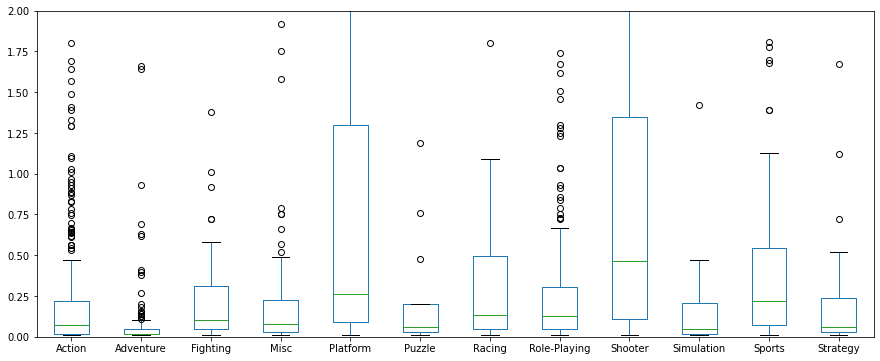

In [66]:
actual_platform.pivot_table(index = 'name', columns = 'genre', values = 'total_sales', aggfunc = 'median').plot(kind='box', figsize=(15,6), ylim=(0,2));

In [67]:
genres = actual_platform.groupby('genre').agg({'name':'count', 'total_sales': ['sum', 'median']})
genres.columns = ['count', 'sum','median']

In [68]:
display(genres.sort_values(by = 'median', ascending = False))

,count,sum,median
genre,,,
Shooter,187,232.98,0.450
Sports,214,150.65,0.240
Platform,74,42.63,0.225
Role-Playing,292,145.89,0.125
Fighting,80,35.31,0.125
Racing,85,39.89,0.120
Action,766,321.87,0.110
Simulation,62,21.76,0.100
Misc,155,62.82,0.100


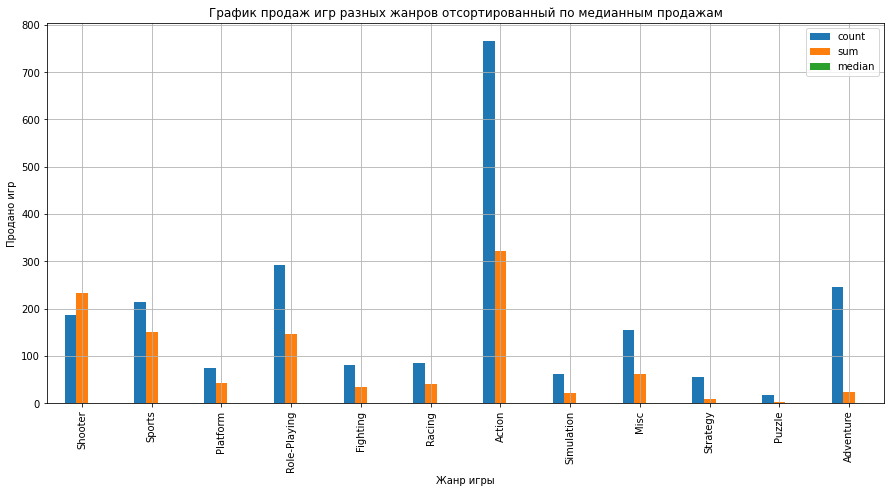

In [69]:
genres.sort_values(by='median', ascending=False).plot(kind='bar', 
                                                      title='График продаж игр разных жанров отсортированный по медианным продажам', 
                                                      xlabel='Жанр игры', 
                                                      ylabel='Продано игр', 
                                                      grid=True, 
                                                      figsize=(15, 7));

Топ жанров по количству выпущенных игр в актуальном периоде, выглядит так:
* Action
* Role-Playing
* Adventure
* Sports
* Shooter

В то время как пятерка жанров лидеров по продажам выглядит несколько иначе
* Action
* Shooter
* Sports
* Role-Playing
* Misc


Для объективной оценки мы построили график медианных продаж в зависимости от жанра игры. Это будет являться наиболее наглядной оценкой перспективности того или иного жанра. Поскольку, например в жанре Экшн, являющемся лидером по количеству выпускаемых игр, всё далеко не так хорошо с продажами. А вот Шутеры демонстрируют уникальное достижение, их продажи превосходят количество выпущенных игр и по медианному значению продаж они занимают лидирующую позицию. На другой стороне этого полюса отметим катастрофическую ситуацию в играх жанра Adventure. Находясь на 3 месте по количеству выпускаемых в продакшн игр, они занимают лишь 9 место по продажам и последнее по медианным показателям продаж. Катастрофически низкая эффективность. 
Стратегии и пазлы находятся на задворках интереса как производителей, так и покупателей. У Платформенных игр хорошие показатели медианных продаж, но очень малое количество выпускаемых игр, что тоже не очень обнадеживающий параметр.


Резюмируя, можно порекомендовать вкладываться в игры жанров: 
* Shooter 
* Sports
* Role-Playing

###  Портрет пользователя каждого региона

#### Определение долей продаж по перспективным платформам в разных регионах

К финалу исследования мы все более сужаем рамку, чтобы постараться надежнее отфильтровать данные для построения прогнозов о перспективах тех или иных платформ в будущих продажах. В данном разделе проанализированы продажи игр на 5 актуальных и перспективных платформах за актуальный период, это XOne, PS4, 3DS, WiiU, PC.

In [70]:
actual_top_5_platforms = actual_platform[actual_platform['platform'].isin(['PS4','XOne','3DS','WiiU','PC',])]

In [71]:
na_sales_platform = actual_top_5_platforms.pivot_table(index='platform', values=[ 'na_sales', 'total_sales'],aggfunc=('sum')).sort_values(by='na_sales',ascending=False)
na_sales_platform

,na_sales,total_sales
platform,,
PS4,108.74,314.14
XOne,93.12,159.32
3DS,38.20,143.25
WiiU,29.21,64.63
PC,11.11,39.43


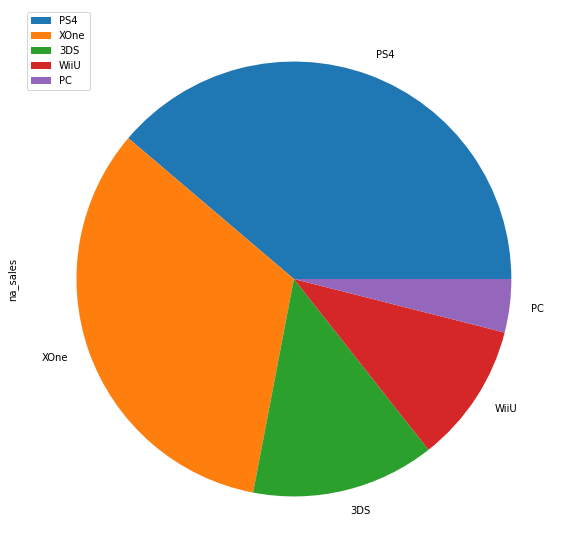

In [72]:
na_sales_platform.plot(kind='pie', y='na_sales', figsize=(10,10));

На рынке Северной Америки присутствует два игрока, которые опережают всех по продажам с огромным отрывом, это платформы PS4 и XOne.

In [73]:
na_sales_platform['%sales'] = na_sales_platform['na_sales'] / na_sales_platform['total_sales']

In [74]:
na_sales_platform.sort_values(by='%sales',ascending=False)

,na_sales,total_sales,%sales
platform,,,
XOne,93.12,159.32,0.584484
WiiU,29.21,64.63,0.451957
PS4,108.74,314.14,0.346151
PC,11.11,39.43,0.281765
3DS,38.20,143.25,0.266667


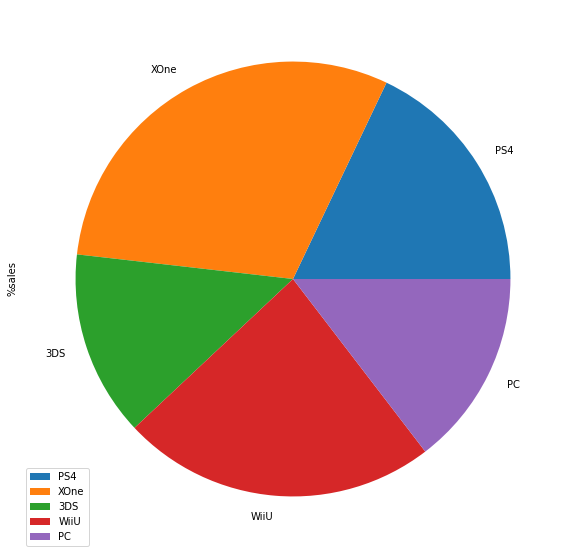

In [75]:
na_sales_platform.plot(kind='pie', y='%sales', figsize=(10,10));

Кроме того, 58% мировых продаж плаформы XOne приходится именно на рынок Северной Америки. Здесь же стоит отметить, что и у платформы WiiU сильны позиции в Северной Америке. Не с точки зрения абсолютного количества продаж, а доли рынка. 45% продаж этой платформы происходят в Северной Америке.

Далее проанализируем Европейский рынок.

In [76]:
eu_sales_platform = actual_top_5_platforms.pivot_table(index='platform', values=[ 'eu_sales', 'total_sales'],aggfunc=('sum')).sort_values(by='eu_sales',ascending=False)
eu_sales_platform

,eu_sales,total_sales
platform,,
PS4,141.09,314.14
XOne,51.59,159.32
3DS,30.96,143.25
PC,25.36,39.43
WiiU,19.85,64.63


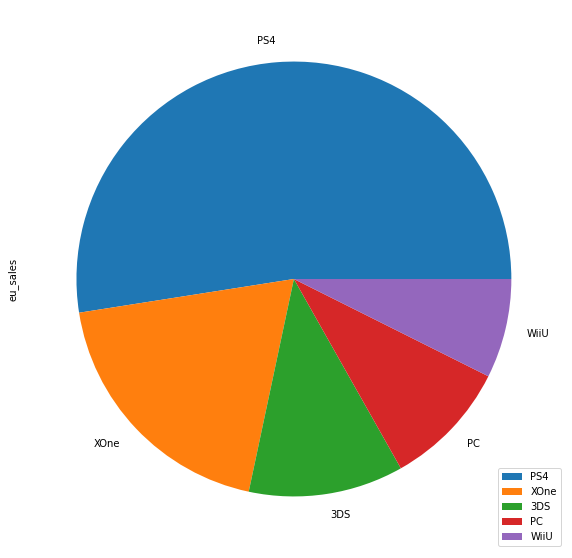

In [77]:
eu_sales_platform.plot(kind='pie', y='eu_sales', figsize=(10,10));

На европейском рынке абсолютное доминирование у платформы PS4, она почти с трехкратным перевесом опережает идущую на втором месте XOne.

In [78]:
eu_sales_platform['%sales'] = eu_sales_platform['eu_sales'] / eu_sales_platform['total_sales']

In [79]:
eu_sales_platform.sort_values(by='%sales',ascending=False)

,eu_sales,total_sales,%sales
platform,,,
PC,25.36,39.43,0.643165
PS4,141.09,314.14,0.449131
XOne,51.59,159.32,0.323814
WiiU,19.85,64.63,0.307133
3DS,30.96,143.25,0.216126


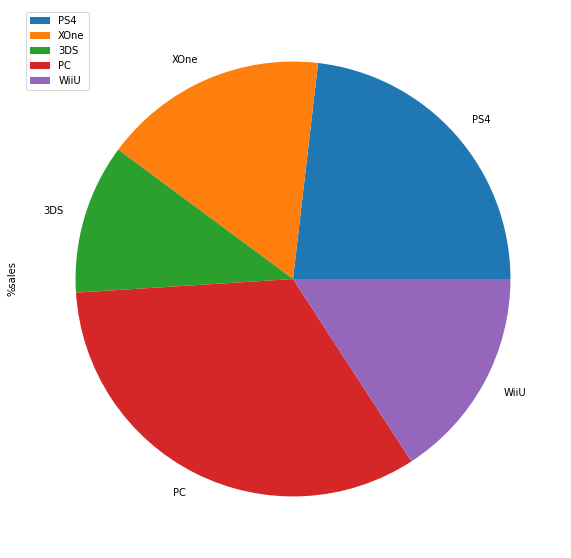

In [80]:
eu_sales_platform.plot(kind='pie', y='%sales', figsize=(10,10));

Отметим важность этого региона для платформы PC, ведь 64% всех игр проданных на этой платформе, продается именно в Европе. Так же можно назвать этот рынок очень важным и для PS4, поскольку около 45% игр этой платформы продаются здесь.

Рассмотрим рынок Японии

In [81]:
jp_sales_platform = actual_top_5_platforms.pivot_table(index='platform', values=[ 'jp_sales', 'total_sales'],aggfunc=('sum')).sort_values(by='jp_sales',ascending=False)
jp_sales_platform

,jp_sales,total_sales
platform,,
3DS,67.81,143.25
PS4,15.96,314.14
WiiU,10.88,64.63
XOne,0.34,159.32
PC,0.00,39.43


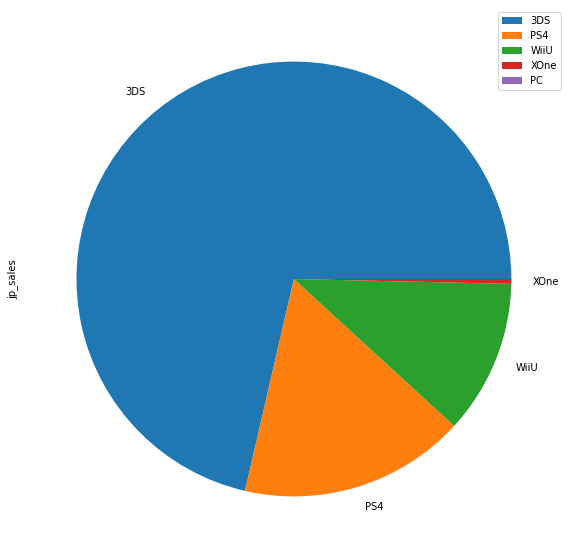

In [82]:
jp_sales_platform.plot(kind='pie', y='jp_sales', figsize=(10,10));

Интересная ситуация на японском рынке, здесь правят местные платформы с абсолютным лидером - 3DS. Отдельно стоит отметить, что у XOne "единичные" продажи в японии, а платформа PC вообще не представлена на японском рынке. 

In [83]:
jp_sales_platform['%sales'] = jp_sales_platform['jp_sales'] / jp_sales_platform['total_sales']

In [84]:
jp_sales_platform.sort_values(by='%sales',ascending=False)

,jp_sales,total_sales,%sales
platform,,,
3DS,67.81,143.25,0.473368
WiiU,10.88,64.63,0.168343
PS4,15.96,314.14,0.050805
XOne,0.34,159.32,0.002134
PC,0.00,39.43,0.000000


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


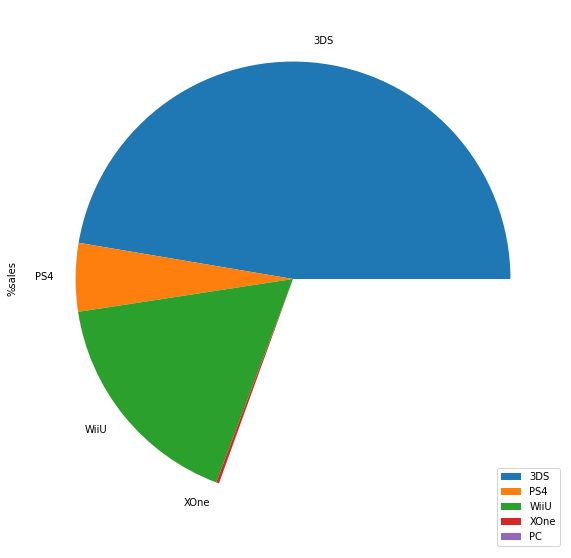

In [85]:
jp_sales_platform.plot(kind='pie', y='%sales', figsize=(10,10));

Как было сказано выше, в отсутствии платформы PC мы получаем вот такой надкусанный пирог в долях рынка от общих продаж. Отметим, что этот рынок на 47% занят платформой 3DS. В то время, как сверхпопулярная в Европе PS4, здесь продает только 5% от своих общих тиражей игр. 

В целом, проанализировав различия между рынками Северной Америки, Европы и Японии можно отметить тендеции к патриотичности пользователей. При наличии своей платформы в стране, она получает сущетсвенную долю рынка. Как например весь рынок Японии занят японскими платформами, а в Северной Америке занимает существенную долю рынка местная платформа XOne. В Европе при отсутсвии местной платформы, неплохо продвигается универсальная PC.

#### Определение популярности игровых жанров по перспективным платформам в разных регионах

In [86]:
na_sales_genre = actual_top_5_platforms.pivot_table(index='genre', values=[ 'na_sales', 'total_sales'],aggfunc=('sum')).sort_values(by='na_sales',ascending=False).head(5)
na_sales_genre

,na_sales,total_sales
genre,,
Shooter,74.85,164.27
Action,72.43,189.46
Sports,36.74,88.59
Role-Playing,36.35,113.71
Platform,14.02,33.75


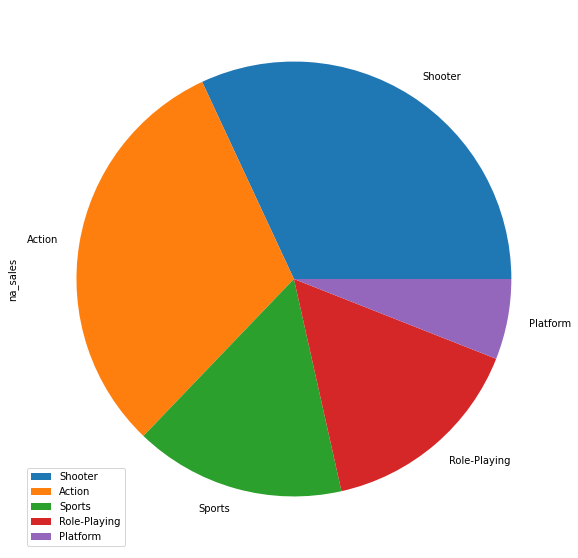

In [87]:
na_sales_genre.plot(kind='pie', y='na_sales', grid=True, figsize=(10,10));

Заметны жанровые предпочтения пользователей региона Северная Америка. Здесь наиболее популярны игры в жанрах Shooter и Action.

In [88]:
na_sales_genre['%sales'] = na_sales_genre['na_sales'] / na_sales_genre['total_sales']

In [89]:
na_sales_genre.sort_values(by='%sales',ascending=False)

,na_sales,total_sales,%sales
genre,,,
Shooter,74.85,164.27,0.455652
Platform,14.02,33.75,0.415407
Sports,36.74,88.59,0.414719
Action,72.43,189.46,0.382297
Role-Playing,36.35,113.71,0.319673


Если рассмотреть процент от проданных игр по всему миру, то можно отметить игры жанра Fighting и Platform. При небольших показателях абсолютных продаж, на рынок Северной Америки приходится по 46% и 41% продаж всех игр этого жанра, соответственно. 45% шутеров так же продается именно здесь.	

Проанализируем Европейский рынок

In [90]:
eu_sales_genre = actual_top_5_platforms.pivot_table(index='genre', values=[ 'eu_sales', 'total_sales'],aggfunc=('sum')).sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_genre

,eu_sales,total_sales
genre,,
Action,71.98,189.46
Shooter,64.34,164.27
Sports,37.91,88.59
Role-Playing,30.96,113.71
Racing,15.17,30.26


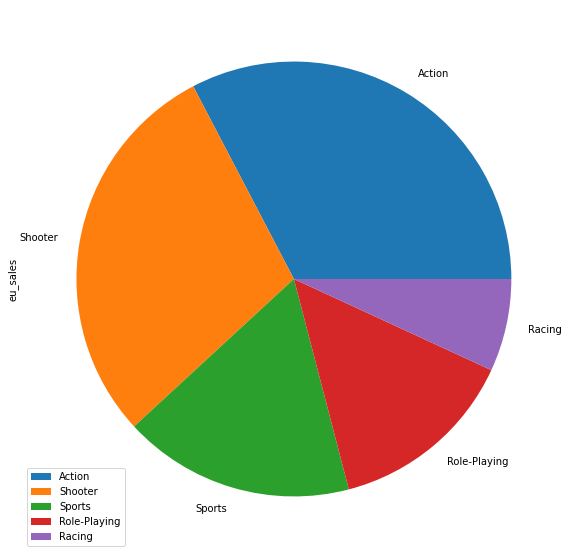

In [91]:
eu_sales_genre.plot(kind='pie', y='eu_sales', grid=True, figsize=(10,10));

Распределение популярных жанров в целом схоже с Северной Америкой, за исключением того, что Action и Shooter меняются местами на 1-2 местах и в топ-5 в этом регионе попали игры в жанре Racing.

In [92]:
eu_sales_genre['%sales'] = eu_sales_genre['eu_sales'] / na_sales_genre['total_sales']

In [93]:
eu_sales_genre.sort_values(by='%sales',ascending=False)

,eu_sales,total_sales,%sales
genre,,,
Sports,37.91,88.59,0.427926
Shooter,64.34,164.27,0.391672
Action,71.98,189.46,0.379922
Role-Playing,30.96,113.71,0.272272
Racing,15.17,30.26,NaN


Интересный момент, что в процентном соотношении от мировых продаж, лучше всего в Европе продаются игры жанра Sport ~ 43%.

Проанализируем рынок Японии

In [94]:
jp_sales_genre = actual_top_5_platforms.pivot_table(index='genre', values=[ 'jp_sales', 'total_sales'],aggfunc=('sum')).sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_genre

,jp_sales,total_sales
genre,,
Role-Playing,38.00,113.71
Action,24.00,189.46
Misc,6.23,30.81
Platform,4.71,33.75
Fighting,4.68,25.50


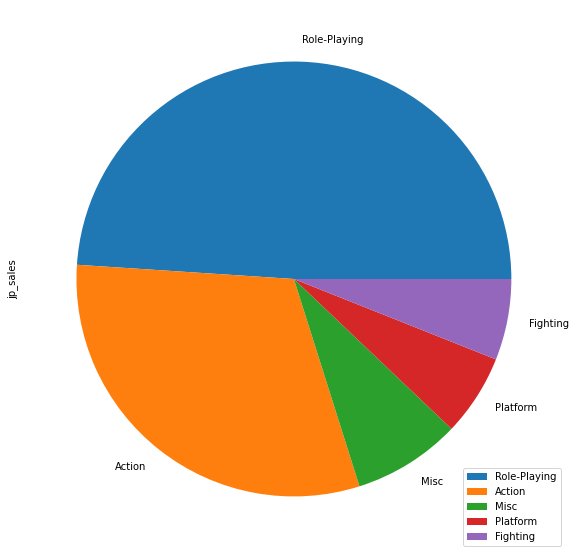

In [95]:
jp_sales_genre.plot(kind='pie', y='jp_sales', grid=True, figsize=(10,10));

Интересный факт, что лидером по продажам на японском рынке выступает жанр Role-Playing. И в целом жанровые предпочтения страны восходящего солнца существенно отличаются от Северной Америки и Европы.

In [96]:
jp_sales_genre['%sales'] = jp_sales_genre['jp_sales'] / jp_sales_genre['total_sales']

In [97]:
jp_sales_genre.sort_values(by='%sales',ascending=False)

,jp_sales,total_sales,%sales
genre,,,
Role-Playing,38.00,113.71,0.334183
Misc,6.23,30.81,0.202207
Fighting,4.68,25.50,0.183529
Platform,4.71,33.75,0.139556
Action,24.00,189.46,0.126676


Процентное распределение относительно мирвых продаж не демонстрирует особых предпочтений японцев. Даже наоборот, на весьма популярный в странах Северной Америки и Европы жанр Action, здесь приходится только 12% мировых продаж, а популярный в остальном мире жанр Shooter здесь вообще не попал в пятерку лидеров.

В качестве общего вывода по жанровым предпочтениям, можно отметить, что разница в зависимости от регона прослеживается и порой она весьма существенна. Можно выделить два универсальных жанра популярных во всех трех регионах исследования, это Action и Role-Playing.

#### Оценка влияния рейтинга ESRB на продажи в отдельном регионе

Классификация игр согласно Entertainment Software Rating Board:
* M - mature - для взрослых
* E - everyone - для всех
* T - teen - подростковые
* E10+ - для всех старше 10 лет

In [98]:
na_sales_ESRB = actual_top_5_platforms.pivot_table(index='rating', values=[ 'na_sales', 'total_sales'],aggfunc=('sum')).sort_values(by='na_sales',ascending=False)
na_sales_ESRB

,na_sales,total_sales
rating,,
M,95.62,223.69
unrated,67.40,208.02
E,51.84,136.37
T,33.67,83.18
E10+,31.85,69.51


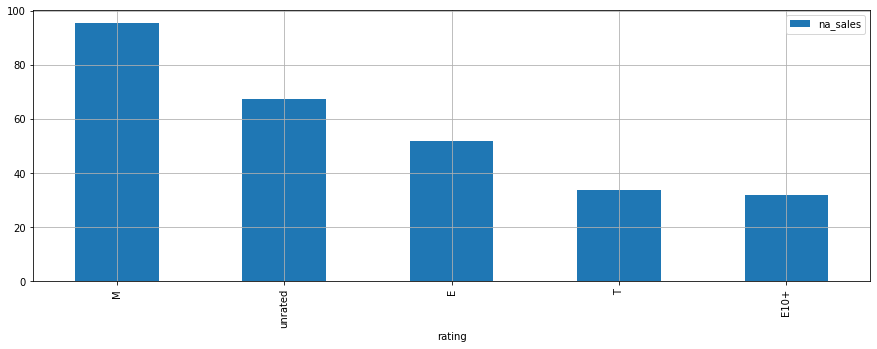

In [99]:
na_sales_ESRB.plot(kind='bar', y='na_sales', grid=True, figsize=(15,5));

В Северной Америке самыми популярными категориями являются игры для взрослых и для всех.

Проанализируем европейский рынок

In [100]:
eu_sales_ESRB = actual_top_5_platforms.pivot_table(index='rating', values=[ 'eu_sales', 'total_sales'],aggfunc=('sum')).sort_values(by='eu_sales',ascending=False)
eu_sales_ESRB

,eu_sales,total_sales
rating,,
M,93.37,223.69
unrated,62.05,208.02
E,57.00,136.37
T,31.38,83.18
E10+,25.05,69.51


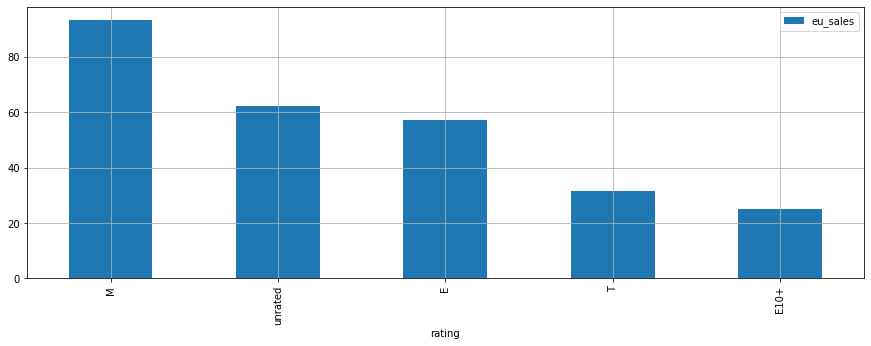

In [101]:
eu_sales_ESRB.plot(kind='bar', y='eu_sales', grid=True, figsize=(15,5));

Позиции жанровых предпочтений в Европе идентичны предпочтениям пользователей в Северной Америке.

Проанализируем рейтинги на рынке Японии

In [102]:
jp_sales_ESRB = actual_top_5_platforms.pivot_table(index='rating', values=['jp_sales', 'total_sales'],aggfunc=('sum')).sort_values(by='jp_sales',ascending=False)
jp_sales_ESRB

,jp_sales,total_sales
rating,,
unrated,61.22,208.02
E,13.20,136.37
T,8.44,83.18
M,6.75,223.69
E10+,5.38,69.51


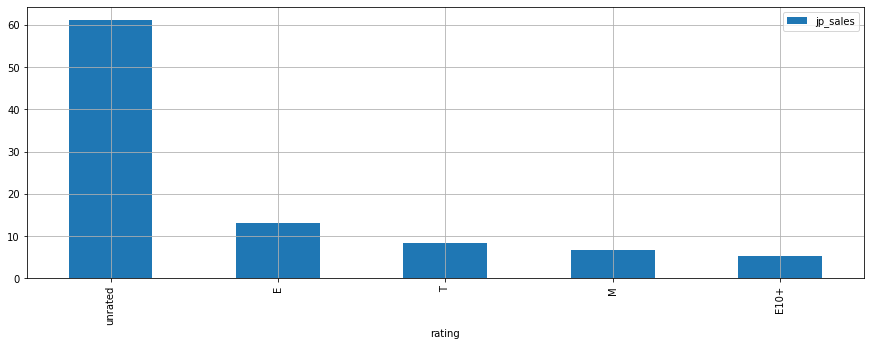

In [103]:
jp_sales_ESRB.plot(kind='bar', y='jp_sales', grid=True, figsize=(15,5));

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [104]:
xone = actual_platform[actual_platform['platform'] == 'XOne']['user_score'].dropna()
pc = actual_platform[actual_platform['platform'] == 'PC']['user_score'].dropna()

In [105]:
print('Cредний пользовательский рейтинг платформы XOne:', xone.mean().round(2))

Cредний пользовательский рейтинг платформы XOne: 6.52


In [106]:
print('Cредний пользовательский рейтинг платформы PC:', pc.mean().round(2))

Cредний пользовательский рейтинг платформы PC: 6.27


Для проверки гипотезы воспользуемся методом ttest_ind сравнив с его помощью две выборки из генеральной совокупности.
Пороговое значение уровня значимости - 5%. Есть некоторые основания предполагать, что дисперсии выборок будут разными, на что мы указываем в методе подсчета p-value

In [107]:
alpha = 0.05

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Эмпирически полученные данные не противоречат нулевой гипотезе. С вероятностью 14% можно получить одинаковые рейтинги XOne и PC.

#### Средние пользовательские рейтинги жанров Action и Sports разные.

* Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
* Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports разные.

In [108]:
action = actual_platform[actual_platform['genre'] == 'Action']['user_score'].dropna()
sports = actual_platform[actual_platform['genre'] == 'Sports']['user_score'].dropna()

In [109]:
print('Cредний пользовательский жанра Action:', action.mean().round(2))

Cредний пользовательский жанра Action: 6.84


In [110]:
print('Cредний пользовательский рейтинг жанра Action:', sports.mean().round(2))

Cредний пользовательский рейтинг жанра Action: 5.24


Для проверки гипотезы воспользуемся методом ttest_ind сравнив с его помощью две выборки из генеральной совокупности.
Пороговое значение уровня значимости - 5%. Есть некоторые основания предполагать, что дисперсии выборок будут разными, на что мы указываем в методе подсчета p-value

In [111]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


По результатам ttest_ind мы можем отвергнуть нулевую гипотезу. Средние оценки игр жанров Action и Sport очень далеки от одинаковости.

В общих рамках исследования перед нами стояли задачи проверить две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

Для проведения этого этапа исследования в обоих случаях были сфорумлированны взаимоисключающие нулевые и альтернативные гипотезы о равенстве или неравенстве средних значений пользовательских рейтингов двух конкретных платформ, а затем двух жанров (можно при необходимости формулировать гипотезы с другими вводными). Далее были определены уровни значимости, при превышении которых нулевая гипотеза отвергалась. Для оценки жизнеспособности нулевых гипотез было расчитано значение p-value - это вероятность получить наблюдаемый результат при условии, что нулевая гипотеза верна. Так же, для проверки гипотез был применен t-тест Стьюдента. С помощью которого мы сравнили два средних значения и выяснили насколько значния отличаются друг от друга.

### Общий вывод

В рамках исследования был получен датасет с данными об играх и игровых платформах, выпускавшихся с 1980 по 2016 гг. Первоначальный датасет состоял из 11 столбцов и 16715 строк. Прежде чем приступить к анализу, была произведена необходимая предобработка данных. Были выявлены столбцы с пропусками и проанализированы типы данных в столбцах, некоторые из которых потребовалось изменить, для проведения корректного анализа. Названия столбцов датасета были приведены к строчному написанию, для удобства написания кода. Пропуски в столбцах заменялись целесообразными значениями. В столбце user_score был обнаружен интересный артефакт – значение tbd (to be determined), который появился, вероятно, в результате малого количества оценок на момент попадания игры в таблицу. Это была заготовка на будущее, которое не наступило. Эти значения были заменены на пропуски – NaN. Пропуски в столбце rating заменили значением unrated. Также было отброшено два значения с пропущенными названиями и годом выпуска. Это 2 игры из 1993 года, с небольшими показателями продаж, которые не оказали влияния на весь датасет. Кроме того было удалено 269 пропусков в столбце "год выпуска игры". Была проведена оценка явных дубликатов в названиях игр. Дубликаты имеются, но по естесвенной причине, поскольку одна и та же игра выпускается на разных платформах и, зачастую, выдерживает проверку временем и заслуживает переиздания и выпуска на новых, более современных платформах. Для удобства проведения анализа был создан дополнительный столбец суммирующий продажи по различным регионам в единые данные.

После чего приступили непосредственно к анализу. Первичный анализ графика выпуска игр по годам показал, что производство игр началось в 1980 году, но до середины 90х шло в штучных количествах, что вполне логично, поскольку персональные компьютеры и игровые приставки в то время были исключением, нежели системой. Быстрый рост выпуска игр начинается после 1993 года и упирается в потолок в 2008 году. Вероятно, это связано с эволюцией мобильных телефонов. В 2007 на рынок вышел первый iPhone, а в 2008 году представлен первый смартфон на платформе Android. После чего, в период с 2009 по 2013 год количество выпускаемых игр сокращается более чем в 2 раза и откатывается к уровню начала 2000х годов. 

Далее были выявлены лидеры продаж по платформам и проанализирован их жизненный цикл. Анализ жизненных циклов топ-6 консолей показывает, что все платформы в среднем живут 10 лет. График распределения жизненного цикла похож на нормальный, пика развития достигают к 5 годам, потом затухают. А также, стоит отметить, что топ-6 платформ к дате проведения анализа сошли на нет. Поэтому далее мы обратили более пристальное внимание именно на такие, молодые и развивающиеся платформы.

Поскольку нам нужно планировать продажи на 2017 год, а цикл жизни популярных консолей составлял 10 лет, с пиком на 5 году жизни, мы выбрали в качестве актуального периода, период начиная с 2013 года. Поскольку в таком случае мы можем отсечь уходящие платформы и одновременно заметить платформы набирающие популярность, на которые можно будет сделать ставку в прогнозах развития. Таким образом была отобрана пятерка перспективных платформ и весь дальнейший анализ проводился актуальному периоду с 2013 года, либо при необходимости по актуальной пятерке в актуальном периоде - PS4, XOne, 3DS, WiiU, PC. 

Было изучено влияние оценок критиков и пользователей на продажи игр. Можно сказать, что оценки критиков имеют большее влияние на продажи, чем оценки пользователей. Хотя и то, и другое не имеет критической значимости. 

Для объективной оценки игровых жанров мы построили график медианных продаж в зависимости от жанра игры. Это является наиболее наглядной оценкой перспективности того или иного игрового жанра. Например в жанре Экшн, являющемся лидером по количеству выпускаемых игр, всё далеко не так хорошо с продажами. А вот Шутеры демонстрируют уникальное достижение, их продажи превосходят количество выпущенных игр и по медианному значению продаж они занимают лидирующую позицию. На другой стороне этого полюса отметим катастрофическую ситуацию в играх жанра Adventure. Находясь на 3 месте по количеству выпускаемых в продакшн игр, они занимают лишь 9 место по продажам и последнее по медианным показателям продаж. Катастрофически низкая эффективность. 
Стратегии и пазлы находятся на задворках интереса как производителей, так и покупателей. У Платформенных игр хорошие показатели медианных продаж, но очень малое количество выпускаемых игр, что тоже не очень обнадеживающий параметр.

Были определены портреты пользователей регионов Северная Америка, Европа и Япония. Проанализирована привязанность геймеров этих регионов к определенному виду платформ, жанров и проанализировано распределение игр по возрастному рейтингу entertainment software rating board. Выявлены некоторая схожесть предпочтений пользователей в регионах Северная Америка и Европа и существенные различия от обоих для региона Япония. 

В завершении были сформулированы и обработаны 2 гипотезы. Одна о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Эту гипотезу мы не смогли опровергнуть. А вторая, что средние пользовательские рейтинги жанров Action и Sports одинаковые. Эта гипотеза была уверено опровергнута.

Подводя общий итог конкретизируем по перспективным платформам: 
* PS4 
* XOne 
* 3DS
* WiiU
* PC (PC старая, не рекордная, но крайне стабильная платформа)

Жанр игры.  
* Shooter 
* Sports
* Role-Playing

Вложения в эти жанры должны приносить наибольшую отдачу.

Если конкретизировать по регионам.
* Северная Америка. 
Здесь стоит сосредоточиться на платформах - XOne и PS4, обе платформы ощущают влияние оценок критиков. 
Игры жанра Shooter, Action и Sport и с рейтингом M и E, будут продаваться вероятнее, чем все прочие варианты.

* Европа.
Актуальные платформы PS4 и XOne, обе платформы ощущают влияние оценок критиков.
Игры жанра Shooter, Action, Sports. Рейтинг M, E.

* Япония.
Актуальная платформа можно сказать одна - 3DS. Эта платформа испытывает накоторое влияние оценок как критиков, так и пользователей.
Аболютные лидеры здесь игры жанра Role-Playing, альтернативой можно назвать Action. Анализ рейтинга для японии нерелевантен, поскольку у нас нет данных от японского рейтингового агентства.

